In [58]:
# Import libraries
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pkg_resources
import pickle


In [59]:
model_file = pkg_resources.resource_filename(
    'fbprophet', 'stan_model/prophet_model.pkl')
print(model_file)


/home/om/Documents/SDAM/dada-ka-ghar/lib/python3.8/site-packages/fbprophet/stan_model/prophet_model.pkl


In [60]:
with Path(model_file).open('rb') as f:
    stan_model = pickle.load(f)


In [61]:
# Load data
gold_df = pd.read_csv("gold_price.csv")
real_estate_df = pd.read_csv("real_estate_price.csv")
crypto_df = pd.read_csv("crypto_price.csv")
stock_df = pd.read_csv("stock_price.csv")

In [62]:
# Prepare data
gold_df = gold_df.rename(columns={"Date": "ds", "Price": "y"})
real_estate_df = real_estate_df.rename(columns={"Date": "ds", "Price": "y"})
crypto_df = crypto_df.rename(columns={"Date": "ds", "Price": "y"})
stock_df = stock_df.rename(columns={"Date": "ds", "Price": "y"})

In [63]:
# Train models
gold_model = Prophet()
real_estate_model = Prophet()
crypto_model = Prophet()
stock_model = Prophet()


In [64]:
gold_model.fit(gold_df)
real_estate_model.fit(real_estate_df)
crypto_model.fit(crypto_df)
stock_model.fit(stock_df)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:

# Generate forecasts
gold_forecast = gold_model.make_future_dataframe(periods=90)
gold_forecast = gold_model.predict(gold_forecast)

real_estate_forecast = real_estate_model.make_future_dataframe(periods=90)
real_estate_forecast = real_estate_model.predict(real_estate_forecast)

crypto_forecast = crypto_model.make_future_dataframe(periods=90)
crypto_forecast = crypto_model.predict(crypto_forecast)

stock_forecast = stock_model.make_future_dataframe(periods=90)
stock_forecast = stock_model.predict(stock_forecast)


In [ ]:

# Visualize results
gold_model.plot(gold_forecast, xlabel="Date", ylabel="Gold Price")
plt.title("Gold Price Forecast")

real_estate_model.plot(real_estate_forecast, xlabel="Date", ylabel="Real Estate Price")
plt.title("Real Estate Price Forecast")

crypto_model.plot(crypto_forecast, xlabel="Date", ylabel="Cryptocurrency Price")
plt.title("Cryptocurrency Price Forecast")

stock_model.plot(stock_forecast, xlabel="Date", ylabel="Stock Price")
plt.title("Stock Price Forecast")

plt.show()


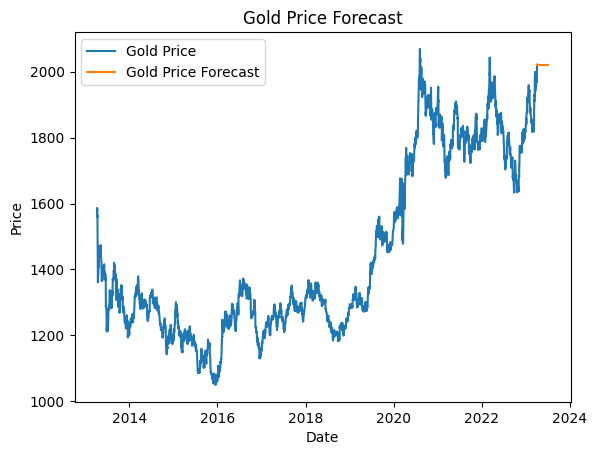

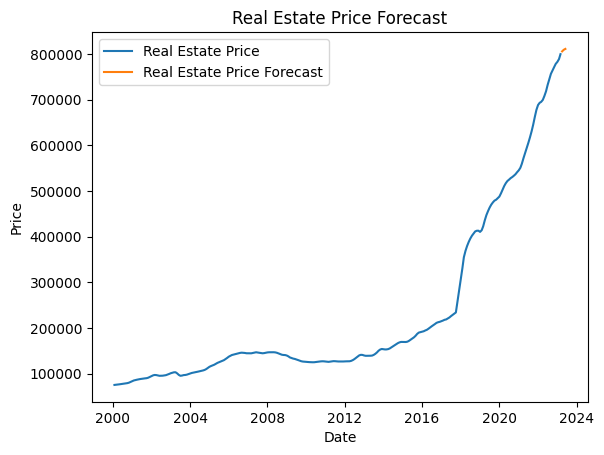

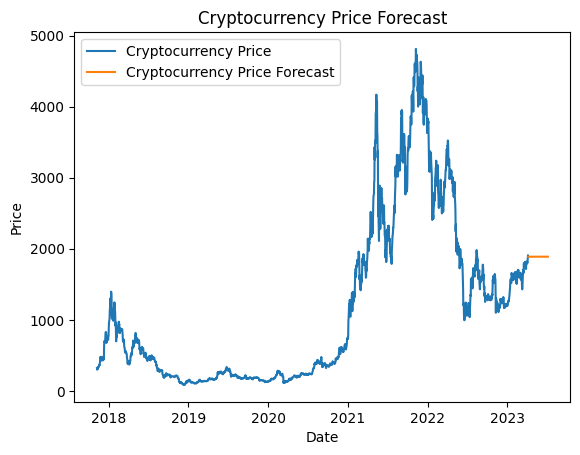

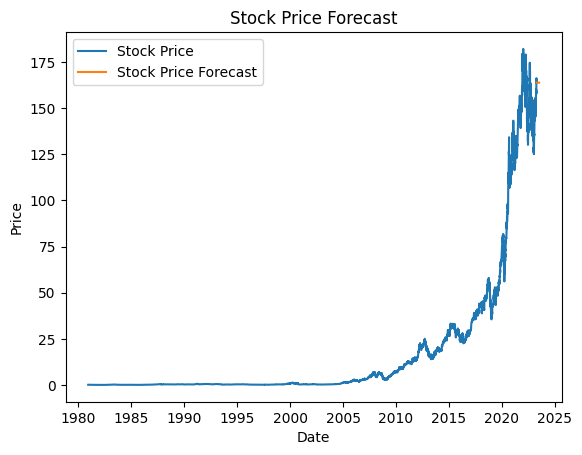

In [66]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
gold_df = pd.read_csv("gold_price.csv")
real_estate_df = pd.read_csv("real_estate_price.csv")
crypto_df = pd.read_csv("crypto_price.csv")
stock_df = pd.read_csv("stock_price.csv")

# Prepare data
gold_df['Date'] = pd.to_datetime(gold_df['Date'])
gold_df.set_index('Date', inplace=True)
gold_df = gold_df.resample('D').interpolate(method='linear')

real_estate_df['Date'] = pd.to_datetime(real_estate_df['Date'])
real_estate_df.set_index('Date', inplace=True)
real_estate_df = real_estate_df.resample('M').interpolate(method='linear')

crypto_df['Date'] = pd.to_datetime(crypto_df['Date'])
crypto_df.set_index('Date', inplace=True)
crypto_df = crypto_df.resample('D').interpolate(method='linear')

stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df.set_index('Date', inplace=True)
stock_df = stock_df.resample('D').interpolate(method='linear')

# Train models
gold_model = sm.tsa.ARIMA(gold_df, order=(1, 1, 0))
real_estate_model = sm.tsa.ARIMA(real_estate_df, order=(1, 1, 0))
crypto_model = sm.tsa.ARIMA(crypto_df, order=(1, 1, 0))
stock_model = sm.tsa.ARIMA(stock_df, order=(1, 1, 0))

gold_result = gold_model.fit()
real_estate_result = real_estate_model.fit()
crypto_result = crypto_model.fit()
stock_result = stock_model.fit()

# Generate forecasts
gold_forecast = gold_result.predict(
    start=len(gold_df), end=len(gold_df)+89, typ='levels')
real_estate_forecast = real_estate_result.predict(
    start=len(real_estate_df), end=len(real_estate_df)+2, typ='levels')
crypto_forecast = crypto_result.predict(
    start=len(crypto_df), end=len(crypto_df)+89, typ='levels')
stock_forecast = stock_result.predict(
    start=len(stock_df), end=len(stock_df)+89, typ='levels')

# Visualize results
plt.plot(gold_df, label='Gold Price')
plt.plot(gold_forecast, label='Gold Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Price Forecast')
plt.legend()
plt.show()

plt.plot(real_estate_df, label='Real Estate Price')
plt.plot(real_estate_forecast, label='Real Estate Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Real Estate Price Forecast')
plt.legend()
plt.show()

plt.plot(crypto_df, label='Cryptocurrency Price')
plt.plot(crypto_forecast, label='Cryptocurrency Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Cryptocurrency Price Forecast')
plt.legend()
plt.show()

plt.plot(stock_df, label='Stock Price')
plt.plot(stock_forecast, label='Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast')
plt.legend()
plt.show()
